## Import Librares
Not all of them are using in this code, I will clear it next days

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.pylabtools import figsize

from scipy.io import arff
import pandas as pd

import math

from sklearn import preprocessing
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import progressbar

from scipy.stats.stats import pearsonr, kendalltau, spearmanr

import progressbar

## Import data
This it one of the parts of VPN-nonVPN dataset. It has 3 scenarious, more info here

https://www.unb.ca/cic/datasets/vpn.html

In [2]:
data = arff.loadarff('Data_VPN/Scenario A2/TimeBasedFeatures-Dataset-60s-VPN.arff')
df = pd.DataFrame(data[0])

In [3]:
df.head(1)

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,601.077345,370.00945,4315.726934,...,1815.741336,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,b'VPN-BROWSING'


In [4]:
X = df.drop('class1', axis=1)
y = df["class1"]

In [5]:
y.value_counts()

b'VPN-BROWSING'     2500
b'VPN-VOIP'         1620
b'VPN-FT'            898
b'VPN-P2P'           823
b'VPN-CHAT'          514
b'VPN-MAIL'          383
b'VPN-STREAMING'     197
Name: class1, dtype: int64

## Labels desctiptions
It operates with numerical labels
Yes, we can operate with names of classes, but it needs some more code

In [6]:
y_multi = np.zeros(len(y))

for i in range(0, len(y)):
    if y[i] == b'VPN-BROWSING':
        y_multi[i] = 0
    if y[i] == b'VPN-VOIP':
        y_multi[i] = 1 
    if y[i] == b'VPN-FT':
        y_multi[i] = 2 
    if y[i] == b'VPN-P2P':
        y_multi[i] = 3 
    if y[i] == b'VPN-CHAT':
        y_multi[i] = 4
    if y[i] == b'VPN-MAIL':
        y_multi[i] = 5
    if y[i] == b'VPN-STREAMING':
        y_multi[i] = 6  

## Data normalization
We need to normalize all our data  and split it on train and test
Next we will split it on 3 parts: train / test / validation

In [7]:
scaler = MinMaxScaler()
X = np.nan_to_num(X)
scaler.fit(X)
X = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size = 0.3,random_state = 42, 
                                                    shuffle=True, stratify=y_multi)

## ML algorithms
All algs has a same API: we train it with "fit" and then we "predict" values

Now it is not very clear with classification and regression

# Sklearn 0.21.2

## SVM 

In [20]:
modelSVC = SVC(random_state=42)
SVC_acc = []

progress = progressbar.ProgressBar()
for i in progress(range(1, 20)):
    modelSVC.n_estimators = i
    modelSVC.fit(X_train, y_train.ravel())
    SVC_acc.append(accuracy_score(y_test.ravel(), modelSVC.predict(X_test)))

100% |########################################################################|


0.5458913983661701


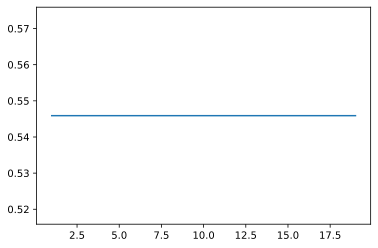

In [22]:
plt.plot(range(1, 20), SVC_acc, label="Accuracy")
print(max(SVC_acc))

## GBDT

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT = GradientBoostingClassifier(random_state=42, n_estimators=10)
GBDT_acc = []

progress = progressbar.ProgressBar()
for i in progress(range(1, 20)):
    GBDT.n_estimators = i
    GBDT.fit(X_train, y_train.ravel())
    GBDT_acc.append(accuracy_score(y_test.ravel(), RF.predict(X_test)))

100% |########################################################################|


0.8515136953387794


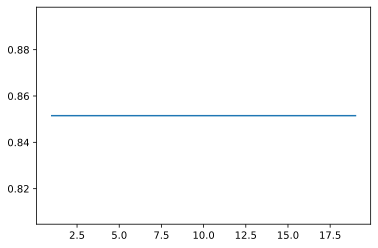

In [31]:
plt.plot(range(1, 20), GBDT_acc, label="Accuracy")
print(max(GBDT_acc))

## Random Forest

In [15]:
RF = RandomForestClassifier(random_state=42)
RF_acc = []

progress = progressbar.ProgressBar()
for i in progress(range(1, 20)):
    RF.n_estimators = i
    RF.fit(X_train, y_train.ravel())
    RF_acc.append(accuracy_score(y_test.ravel(), RF.predict(X_test)))

100% |########################################################################|


0.8515136953387794


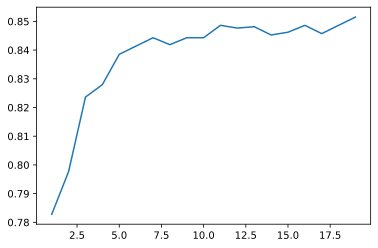

In [16]:
plt.plot(range(1, 20), RF_acc, label="Accuracy")
print(max(RF_acc))

## GPR

In [34]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
GPR_class = GaussianProcessClassifier(kernel=kernel,random_state=0)

GPR_acc = []

progress = progressbar.ProgressBar()
for i in progress(range(1, 20)):
    GPR_class.n_estimators = i
    GPR_class.fit(X_train, y_train.ravel())
    GPR_acc.append(accuracy_score(y_test.ravel(), GPR_class.predict(X_test)))

KeyboardInterrupt: 

In [ ]:
plt.plot(range(1, 20), GPR_acc, label="Accuracy")
print(max(GPR_acc))

## Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(random_state=0)
IF_acc = []

progress = progressbar.ProgressBar()
for i in progress(range(1, 20)):
    IF.n_estimators = i
    IF.fit(X_train, y_train.ravel())
    IF_acc.append(accuracy_score(y_test.ravel(), IF.predict(X_test)))

100% |########################################################################|


0.2268140317155214


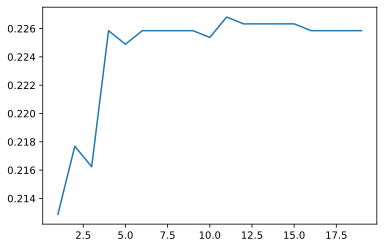

In [28]:
plt.plot(range(1, 20), IF_acc, label="Accuracy")
print(max(IF_acc))

# XGboost 0.90

## XGboost

In [36]:
#from xgboost.sklearn.XGBClassifier import XGBClassifier
from xgboost import XGBClassifier

In [37]:
XGB = XGBClassifier(random_state=0)
XGB_acc = []

progress = progressbar.ProgressBar()
for i in progress(range(1, 20)):
    XGB.n_estimators = i
    XGB.fit(X_train, y_train.ravel())
    XGB_acc.append(accuracy_score(y_test.ravel(), XGB.predict(X_test)))

100% |########################################################################|


0.762614127823162


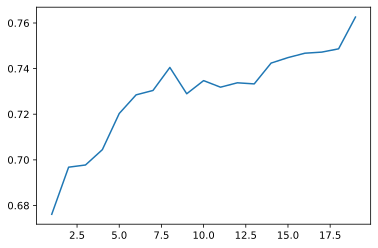

In [38]:
plt.plot(range(1, 20), XGB_acc, label="Accuracy")
print(max(XGB_acc))